In [1]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 


In [ ]:

df_iris = pd.read_csv("iris_teach_2.csv")
print(df_iris.head())

In [4]:
missing_values = df_iris.isnull().sum()
print(missing_values)

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64


In [5]:
df_iris.dropna(inplace=True)
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64


In [ ]:
X = df_iris.drop(columns=["iris_name"])
y = df_iris["iris_name"]

print(X.head())
print(y.head())

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(y[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split
#nu avem nevoie sa face reshape.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [13]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


[Text(0.3, 0.9285714285714286, 'x[2] <= 2.6\nentropy = 1.579\nsamples = 120\nvalue = [36, 45, 39]'),
 Text(0.2, 0.7857142857142857, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.25, 0.8571428571428572, 'True  '),
 Text(0.4, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.35, 0.8571428571428572, '  False'),
 Text(0.3, 0.6428571428571429, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.5, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.567\nsamples = 45\nvalue = [0, 6, 39]'),
 Text(0.2, 0.5, 'x[2] <= 4.95\nentropy = 0.991\nsamples = 9\nvalue = [0, 5, 4]'),
 Text(0.1, 0.35714285714285715, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.21428571428571427, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.21428571428571427, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text

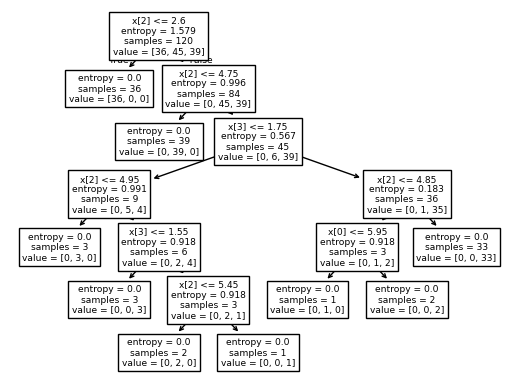

In [49]:
# Visualize the decision tree 
plot_tree(tree_clf)

In [29]:


viz = dtreeviz(tree_clf, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               orientation='LR'

               )
viz

C:\Users\alex_\AppData\Local\Temp\ipykernel_35100\668141701.py:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [50]:
# Define the hyperparameters to search over 
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 4}


In [51]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\nentropy = 1.579\nsamples = 120\nvalue = [36, 45, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.567\nsamples = 45\nvalue = [0, 6, 39]')]

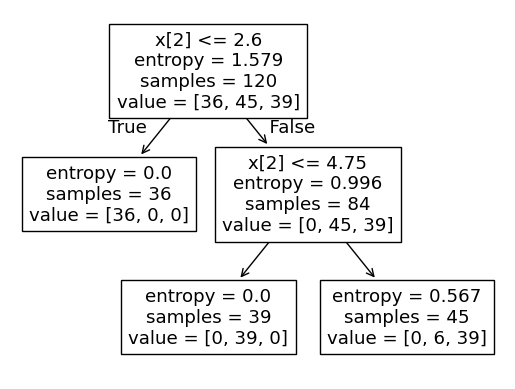

In [52]:
# Visualize the decision tree 
plot_tree(tree_clf_tuned)

In [54]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

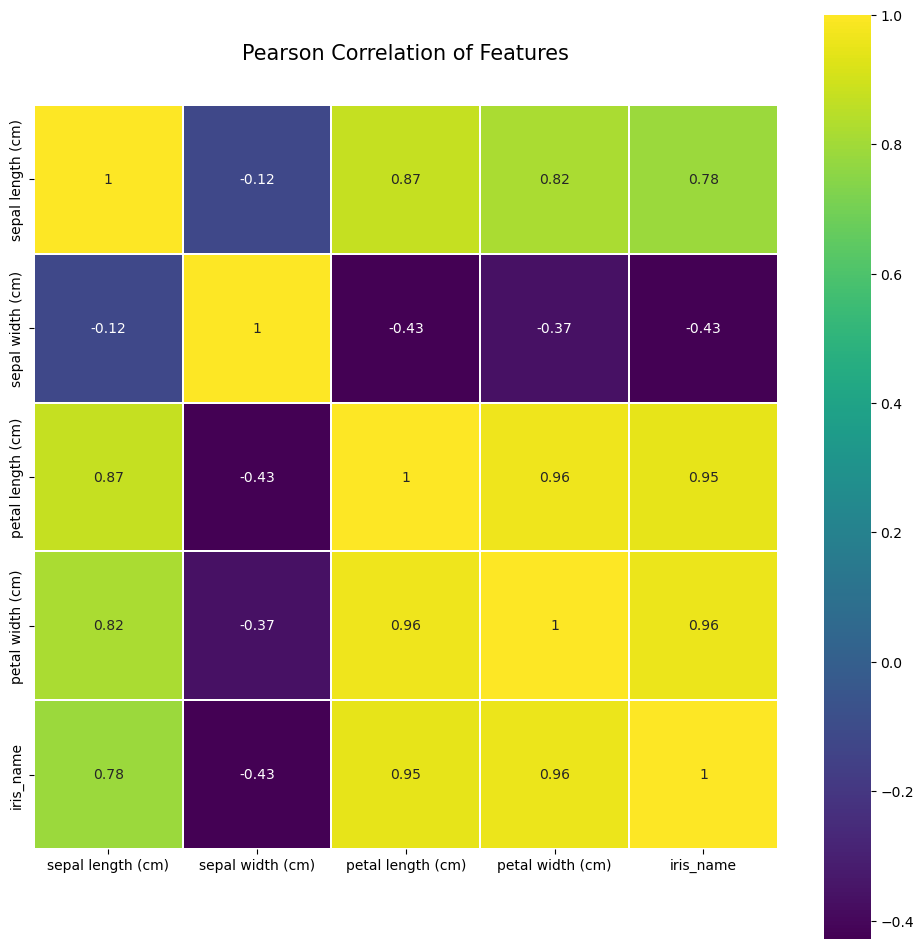

In [55]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Accuracy: 0.97

 max_depth: 2
Best accuracy: 1.00


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\nentropy = 1.582\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 0.996\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.201\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.544\nsamples = 48\nvalue = [0, 6, 42]')]

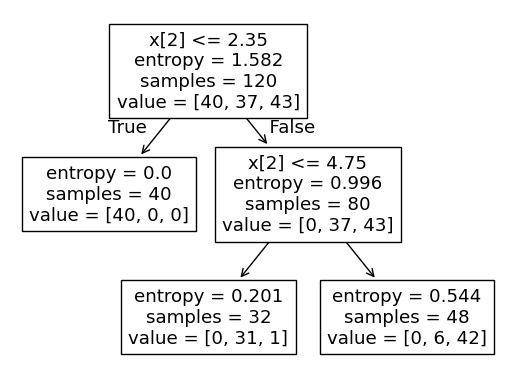

In [68]:
#HW

X = df_iris.drop(columns=["petal width (cm)", "iris_name"])
y = df_iris["iris_name"]

missing_values = df_iris.isnull().sum()
df_iris.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321) #pot schimba pentru o acuratete mai mica.

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

max_depth = 0
max_score = 0
for depth in range(1, 7):
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    score = tree_clf.score(X_test, y_test)
    if score > max_score:
        max_score = score
        max_depth = depth

print(f"\n max_depth: {max_depth}")
print(f"Best accuracy: {max_score:.2f}")

tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)